In [3]:
import sys
sys.path.insert(0, '../scripts')
sys.path.insert(0, '../data/database')
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import seaborn as sns
import datetime
sns.set()

In [7]:
def retrieve_data():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        milk = pd.read_sql_table('milk_volume', con).set_index(['date'])
        #score = pd.read_sql_table('classification', con).set_index(['date'])
    return milk

In [8]:
milk = retrieve_data()
milk_2016 = milk['2016-01-01':'2016-12-31']
milk_2017 = milk['2016-01-01':'2016-12-31']

In [50]:
def build_monthly_herd_summary(milk):
    milk = milk.reset_index()
    
    monthly_summary = pd.DataFrame()
    # Number of Animals
    monthly_summary['animal_count'] = milk.groupby('date')['animal_id'].nunique().resample('M').mean()
    # Average Milk Weight Per Animal per Month
    monthly_summary['weight'] = milk.groupby('date')['milk_weight'].mean().resample('M').mean()
    
    monthly_summary = monthly_summary.reset_index()
    monthly_summary['label'] = monthly_summary['date'].apply(lambda x: datetime.datetime.strftime(x, r"%b-%y"))
    
    return monthly_summary.set_index('date')

In [51]:
def plot_monthly_summary(milk, year):
    data = build_monthly_herd_summary(milk)
    x = pld.date2num(data.index.to_pydatetime())
    y = data['animal_count']

    ax = plt.subplot(111)
    plt.bar(x, y, width=20)
    ax.xaxis_date()
    labels = ['January', 'February', 'March', 'April', ' ']
    _ = plt.ylabel('Animal Count')
    _ = plt.xlabel('Month')
    _ = plt.xticks(rotation='vertical')
    _ = plt.title('Total Animals Milked by Month')
    plt.show()

In [52]:
monthly_summary = build_monthly_herd_summary(milk)

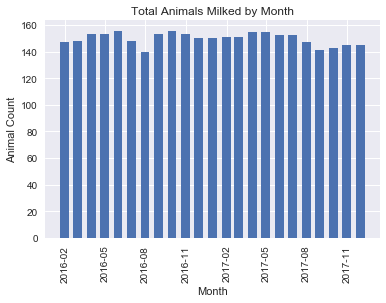

In [53]:
plot_monthly_summary(milk)

In [54]:
def plot_daily_milk_averages(milk):
    sns.violinplot(milk.groupby('date')['milk_weight'].mean(), orient='vertical')
    _ = plt.ylabel('Milk Weight (Lb)')
    _ = plt.title('Average Daily Per Animal Milk Producttion')
    plt.show()

In [9]:
(7158 - 7017) / 7017

0.020094057289439932